In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("SP500.csv", index_col='date', parse_dates=['date'])

In [3]:
data.head()

,open,high,low,close,volume,Name,per_change,Sector
date,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.021234,Industrials
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.028878,Industrials
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.012457,Industrials
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.025175,Industrials
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.063588,Industrials


In [4]:
data.isnull().sum()

open          11
high           8
low            8
close          0
volume         0
Name           0
per_change    11
Sector         0
dtype: int64

In [5]:
np.where(pd.isnull(data))

(array([ 82949,  82949,  82949,  82949, 165734, 165734, 165857, 165857,
        165857, 165857, 205076, 205076, 239832, 239832, 239832, 239832,
        434379, 434379, 434502, 434502, 434502, 434502, 478594, 478594,
        478594, 478594, 558213, 558213, 558213, 558213, 581906, 581906,
        581906, 581906, 598236, 598236, 598236, 598236]),
 array([0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6,
        0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6]))

In [6]:
data.iloc[165857,:]

open                  NaN
high                  NaN
low                   NaN
close               88.55
volume                  0
Name                  DHR
per_change            NaN
Sector        Health Care
Name: 2016-01-12 00:00:00, dtype: object

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
Name          0
per_change    0
Sector        0
dtype: int64

In [9]:
apple_close = data[data['Name'] == 'AAPL']['close']

In [10]:
apple_close.head()

date
2013-02-08    67.8542
2013-02-11    68.5614
2013-02-12    66.8428
2013-02-13    66.7156
2013-02-14    66.6556
Name: close, dtype: float64

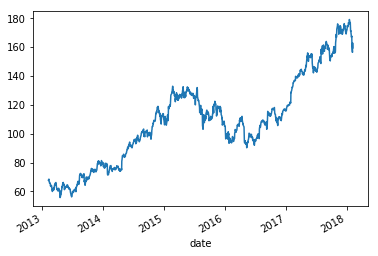

In [11]:
apple_close.plot()

In [12]:
apple_20d_sma = apple_close.rolling(window=20).mean()
apple_20d_ema = apple_close.ewm(span=20, min_periods=20).mean()
apple_100d_sma = apple_close.rolling(window=100).mean()

Text(0.5,1,'Apple Close Prices')

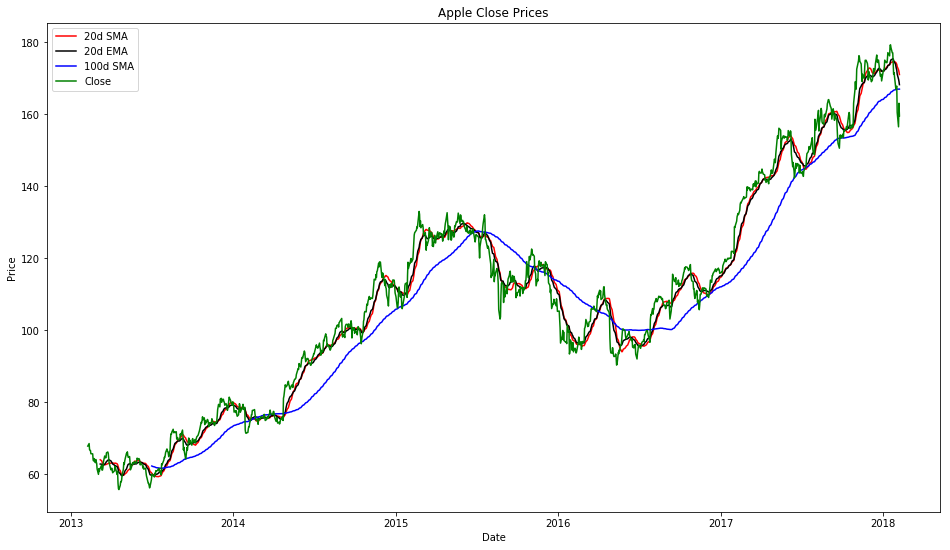

In [16]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(apple_20d_sma.index, apple_20d_sma, label="20d SMA", color="red")
ax.plot(apple_20d_ema.index, apple_20d_ema, label="20d EMA", color="black")
ax.plot(apple_100d_sma.index, apple_100d_sma, label="100d SMA", color="blue")
ax.plot(apple_close.index, apple_close, label="Close", color="green")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Apple Close Prices")

In [17]:
trades_20d_sma = apple_close - apple_20d_sma
trades_20d_ema = apple_close - apple_20d_ema
print(trades_20d_sma.tail(5), trades_20d_ema.tail(5))

date
2018-02-01    -6.0900
2018-02-02   -12.7435
2018-02-05   -15.8280
2018-02-06    -8.7220
2018-02-07   -11.4725
Name: close, dtype: float64 date
2018-02-01    -4.483816
2018-02-02   -10.643452
2018-02-05   -13.257885
2018-02-06    -6.078087
2018-02-07    -8.656840
Name: close, dtype: float64


In [18]:
trades_20d_sma = trades_20d_sma.apply(np.sign)
trades_20d_ema = trades_20d_ema.apply(np.sign)

In [19]:
trades_20d_sma = trades_20d_sma.shift(1)
trades_20d_ema = trades_20d_ema.shift(1)

Text(0.5,1,'20D EMA Indicator')

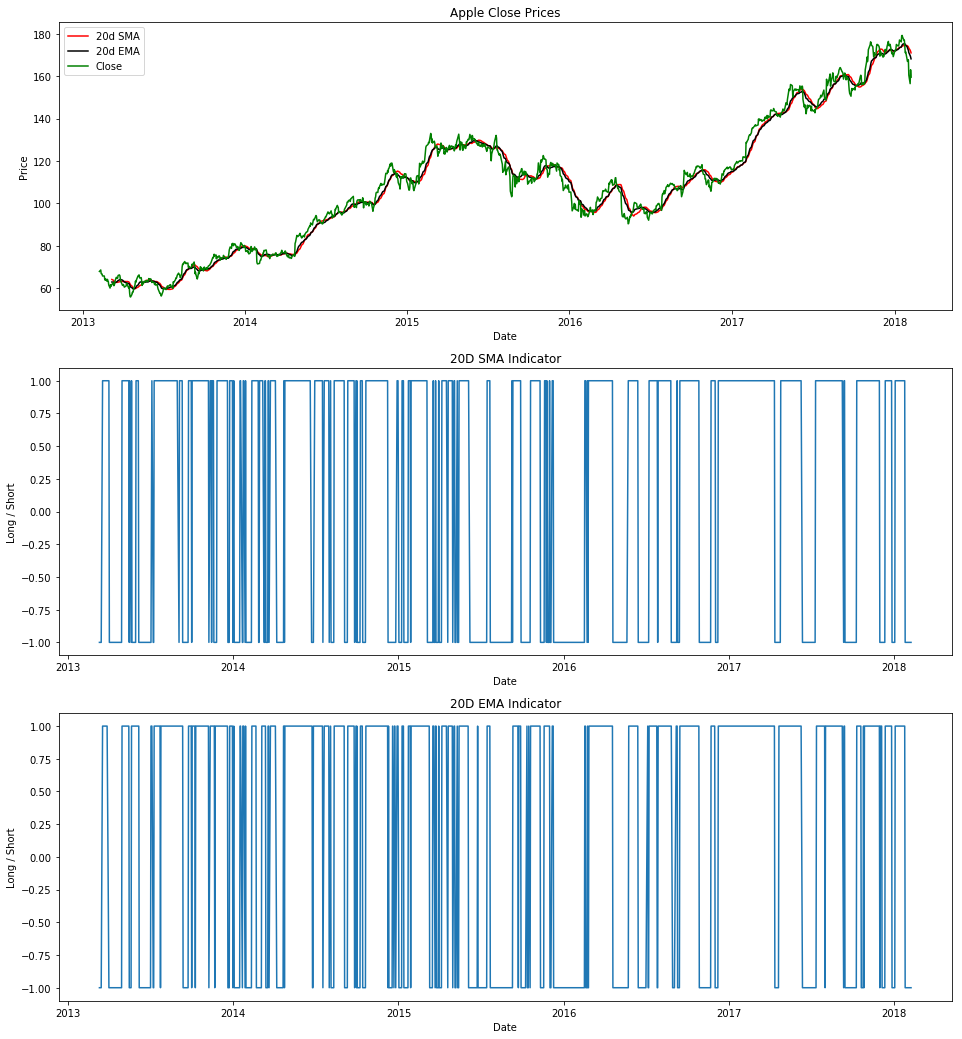

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,18))
ax1.plot(apple_20d_sma.index, apple_20d_sma, label="20d SMA", color="red")
ax1.plot(apple_20d_ema.index, apple_20d_ema, label="20d EMA", color="black")
#ax1.plot(apple_100d_sma.index, apple_100d_sma, label="100d SMA", color="blue")
ax1.plot(apple_close.index, apple_close, label="Close", color="green")
ax1.legend()
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.set_title("Apple Close Prices")
ax2.plot(trades_20d_sma.index, trades_20d_sma)
ax2.set_xlabel("Date")
ax2.set_ylabel("Long / Short")
ax2.set_title("20D SMA Indicator")
ax3.plot(trades_20d_ema.index, trades_20d_ema)
ax3.set_xlabel("Date")
ax3.set_ylabel("Long / Short")
ax3.set_title("20D EMA Indicator")